# 3. market basket analysis suggesting new products

## Bakery Market Basket Analysis


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//breadbasket.csv")

In [3]:
data.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [4]:
print(data.info())
print('-'*70)
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None
----------------------------------------------------------------------
Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')


In [7]:
print("List of Items sold at the Bakery:")
print("Total Items: ",len(data.Item.unique()))
print("-"*70)
for i in data.Item.unique():
    print(i)

List of Items sold at the Bakery:
Total Items:  95
----------------------------------------------------------------------
Bread
Scandinavian
Hot chocolate
Jam
Cookies
Muffin
Coffee
Pastry
Medialuna
Tea
NONE
Tartine
Basket
Mineral water
Farm House
Fudge
Juice
Ella's Kitchen Pouches
Victorian Sponge
Frittata
Hearty & Seasonal
Soup
Pick and Mix Bowls
Smoothies
Cake
Mighty Protein
Chicken sand
Coke
My-5 Fruit Shoot
Focaccia
Sandwich
Alfajores
Eggs
Brownie
Dulce de Leche
Honey
The BART
Granola
Fairy Doors
Empanadas
Keeping It Local
Art Tray
Bowl Nic Pitt
Bread Pudding
Adjustment
Truffles
Chimichurri Oil
Bacon
Spread
Kids biscuit
Siblings
Caramel bites
Jammie Dodgers
Tiffin
Olum & polenta
Polenta
The Nomad
Hack the stack
Bakewell
Lemon and coconut
Toast
Scone
Crepes
Vegan mincepie
Bare Popcorn
Muesli
Crisps
Pintxos
Gingerbread syrup
Panatone
Brioche and salami
Afternoon with the baker
Salad
Chicken Stew
Spanish Brunch
Raspberry shortbread sandwich
Extra Salami or Feta
Duck egg
Baguette
Valen

In [8]:
data.describe(include='all')

Date      Time   Transaction    Item
count        21293     21293  21293.000000   21293
unique         159      8240           NaN      95
top     2017-02-04  12:07:39           NaN  Coffee
freq           302        16           NaN    5471
mean           NaN       NaN   4951.990889     NaN
std            NaN       NaN   2787.758400     NaN
min            NaN       NaN      1.000000     NaN
25%            NaN       NaN   2548.000000     NaN
50%            NaN       NaN   5067.000000     NaN
75%            NaN       NaN   7329.000000     NaN
max            NaN       NaN   9684.000000     NaN

data.describe() => The code only gives us some statistical information about columns with numeric values. This command does not provide the smallest detail.
count: It says how many data there are.
unique: It shows how many non-replicating data there are.
top: It specifies which of the most commonly found data.
freq: -
mean: Returns the average value.
std: standart deviation; returns the standard deviation value.
min: returns the minimum value. 25%: -50%: - *75%: -
max: 

#### We check the number of values in the data set, which are none in the item column.

In [9]:
len(data.loc[data["Item"] == "NONE",:])

786

In [13]:
#In the item column we bring only the first 10 of the data with no value.
print("item column with only the first 10 of the data with no value ")
print(data.loc[data["Item"] == "NONE",:].head(10))
print('-'*70)
#We have brought the last 10 of the values that are none in the item column in the data set.
print("item column with only the last 10 of the data with no value ")
print(data.loc[data["Item"] == "NONE",:].tail(10))

item column with only the first 10 of the data with no value 
           Date      Time  Transaction  Item
26   2016-10-30  10:27:21           11  NONE
38   2016-10-30  10:34:36           15  NONE
39   2016-10-30  10:34:36           15  NONE
66   2016-10-30  11:05:30           29  NONE
80   2016-10-30  11:37:10           37  NONE
85   2016-10-30  11:55:51           40  NONE
126  2016-10-30  13:02:04           59  NONE
140  2016-10-30  13:37:25           65  NONE
149  2016-10-30  13:46:48           67  NONE
167  2016-10-30  14:32:26           75  NONE
----------------------------------------------------------------------
item column with only the last 10 of the data with no value 
             Date      Time  Transaction  Item
20919  2017-04-07  08:57:19         9507  NONE
20964  2017-04-07  13:06:01         9529  NONE
21010  2017-04-07  17:30:07         9550  NONE
21077  2017-04-08  10:44:44         9579  NONE
21080  2017-04-08  10:48:43         9580  NONE
21108  2017-04-08  11:54:22  

### List Of Sold Products

In [14]:


# Let's list the total number of products sold each time. We've only listed the first 15.

data["Item"].value_counts().head(15)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

###  Visualizations Of Sold Products With Pie Chart 

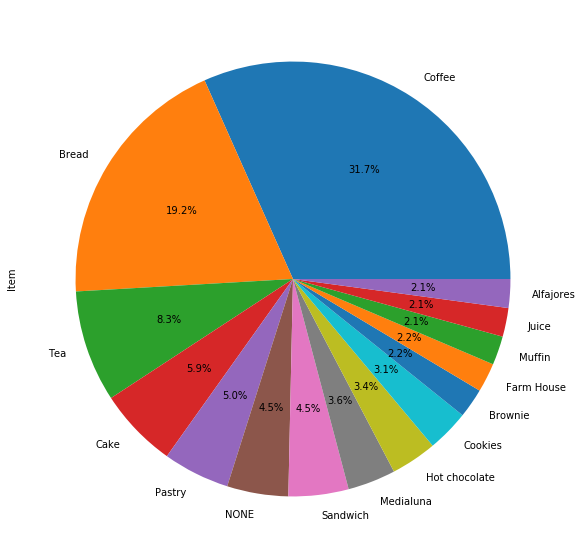

In [15]:
#Using the pie chart visualisation of the Matplotlib library, we have listed only 15 of the best-selling products.
# Pie Chart
plt.figure(1, figsize=(10,10))
data['Item'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

### Visualizations Of Best Sold Products With Bar Chart

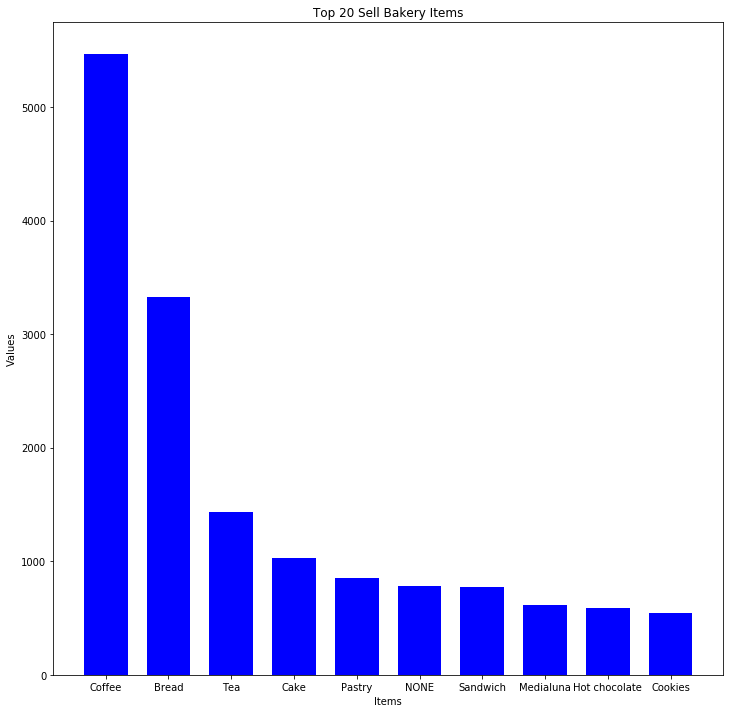

In [17]:
itemNames = data['Item'].value_counts().index
itemValues = data['Item'].value_counts().values

# We use the following structure when we want to show the first 15 of the best-selling products with bar chart in matplot.

plt.figure(figsize=(12,12))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Top 20 Sell Bakery Items')
plt.bar(itemNames[:10],itemValues[:10], width = 0.7, color="blue",linewidth=0.4)
plt.show()

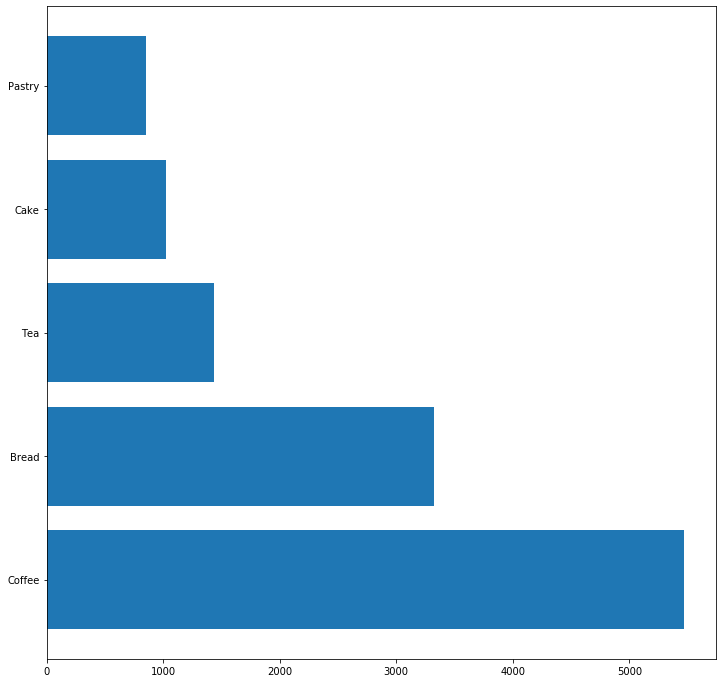

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
plt.style.use('fivethirtyeight')
ax.barh(itemNames[:5], itemValues[:5])
plt.show()

### Determination Of Most Sales Time Zones 

In [19]:
firstMorning = data.loc[(data['Time']>='06:00:00')&(data['Time']<'09:00:00')]
secondMorning = data.loc[(data['Time']>='09:00:00')&(data['Time']<'12:00:00')]
firstAfternoon = data.loc[(data['Time']>='12:00:00')&(data['Time']<'15:00:00')]
secondAfternoon = data.loc[(data['Time']>='15:00:00')&(data['Time']<'18:00:00')]
night = data.loc[(data['Time']>='18:00:00')&(data['Time']<'21:00:00')]
hourlySales = {'firstMorning': len(firstMorning), 'secondMorning': len(secondMorning), 'firstAfternoon': len(firstAfternoon),'secondAfternoon': len(secondAfternoon),'night': len(night)}
print("This is night sales: ", hourlySales['night'])

This is night sales:  152


### Determining The Best-selling Product In The Most-selling Time Frame

In [20]:
print(firstMorning['Item'].value_counts().head(15))

Coffee           212
Bread            173
Pastry            59
Medialuna         49
NONE              25
Toast             24
Tea               21
Farm House        13
Cookies           12
Hot chocolate      9
Cake               8
Baguette           8
Jam                7
Scandinavian       6
Scone              6
Name: Item, dtype: int64


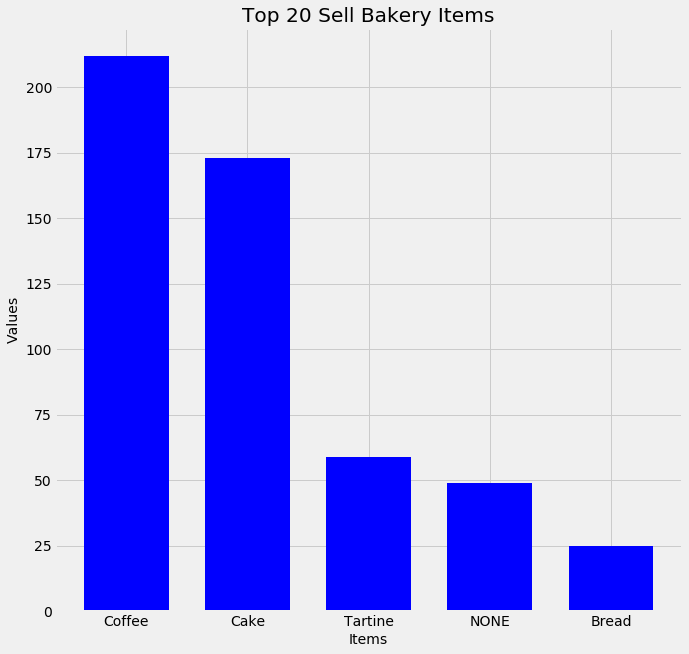

In [21]:
# Bar Plot
plt.figure(figsize=(10,10))
plt.ylabel('Values', fontsize='medium')
plt.xlabel('Items', fontsize='medium')
plt.title('Top 20 Sell Bakery Items')
plt.bar(firstMorning['Item'][:5],firstMorning['Item'].value_counts()[:5], width = 0.7, color="blue",linewidth=0.4)
plt.show()

In [22]:
data['datetime'] = pd.to_datetime(data['Date']+" "+data['Time'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['weekday'] = data['datetime'].dt.weekday
data['hour'] = data['datetime'].dt.hour
data = data.drop(['Date'], axis=1)

data.head(5)

Time  Transaction           Item            datetime  year  month  day  \
0  09:58:11            1          Bread 2016-10-30 09:58:11  2016     10   30   
1  10:05:34            2   Scandinavian 2016-10-30 10:05:34  2016     10   30   
2  10:05:34            2   Scandinavian 2016-10-30 10:05:34  2016     10   30   
3  10:07:57            3  Hot chocolate 2016-10-30 10:07:57  2016     10   30   
4  10:07:57            3            Jam 2016-10-30 10:07:57  2016     10   30   

   weekday  hour  
0        6     9  
1        6    10  
2        6    10  
3        6    10  
4        6    10

2017    12732
2016     8561
Name: year, dtype: int64

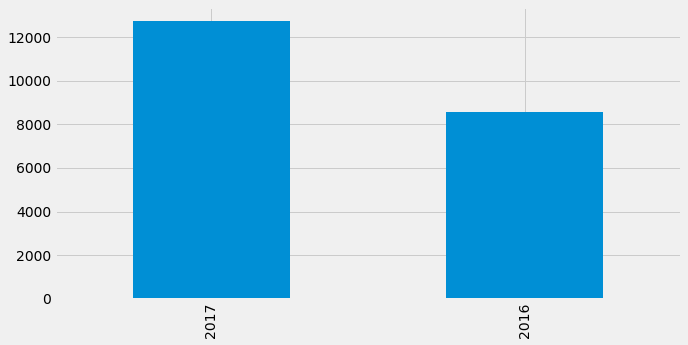

In [23]:
yearlyTable = data['year'].value_counts().plot(kind='bar',figsize=(10,5))
yearlyTable.set_xlabel("")
data['year'].value_counts().head()

Transaction
monthlyTransaction             
2016-10                     385
2016-11                    4607
2016-12                    3569
2017-01                    3509
2017-02                    3991
2017-03                    4041
2017-04                    1191

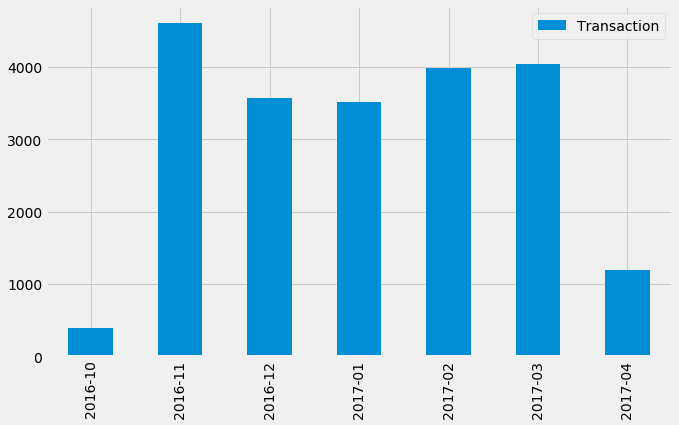

In [25]:
data['monthlyTransaction'] = pd.to_datetime(data['datetime']).dt.to_period('M')
monthlyTransaction = data[['monthlyTransaction',
                           'Transaction']].groupby(['monthlyTransaction'],
                                                   as_index=False).count().sort_values(by='monthlyTransaction')
monthlyTransaction.set_index('monthlyTransaction' ,inplace=True)

monthlyTable = monthlyTransaction.plot(kind='bar',figsize=(10,6))
monthlyTable.set_xlabel("")

monthlyTransaction

Transaction
hour             
1               1
7              25
8             669
9            2045
10           2763
11           3216
12           3021
13           2776
14           2736
15           2147
16           1356
17            372
18             82
19             48
20             22
21              3
22              8
23              3

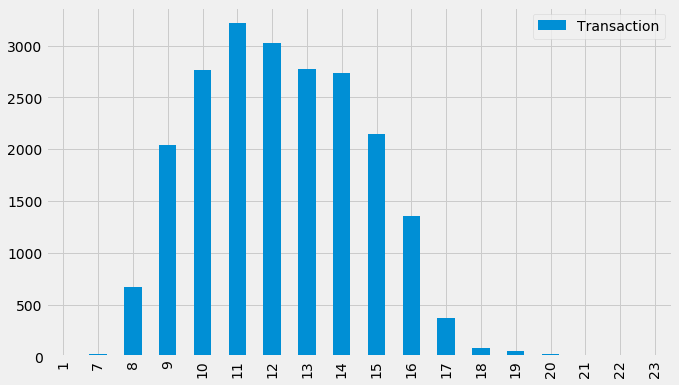

In [26]:
hourlyTransaction = data[['hour','Transaction']].groupby(['hour'], as_index=False).count()
hourlyTransaction.head(10)
hourlyTransaction.set_index('hour' ,inplace=True)

tableSort = hourlyTransaction.plot(kind='bar',figsize=(10,6))
tableSort.set_xlabel("")

hourlyTransaction

In [27]:
data['monthly'] = pd.to_datetime(data['datetime']).dt.to_period('M')
monthlyTransactionForItem = data[['monthly',
                                  'Transaction', 'Item']].groupby(['monthly', 
                                                                   'Item'], as_index=False).count().sort_values(by='monthly')
monthlyTransactionForItem.set_index('monthly' ,inplace=True)

monthlyTransactionForItem.head(35)

Item  Transaction
monthly                                     
2016-10                  Basket            2
2016-10        Victorian Sponge            3
2016-10                 Tartine            6
2016-10                    Soup            8
2016-10               Smoothies            1
2016-10            Scandinavian           16
2016-10                Sandwich            3
2016-10      Pick and Mix Bowls            2
2016-10                  Pastry           19
2016-10                    NONE           16
2016-10        My-5 Fruit Shoot            1
2016-10                  Muffin           29
2016-10           Mineral water            6
2016-10          Mighty Protein            2
2016-10               Medialuna           13
2016-10                     Tea           31
2016-10                     Jam            9
2016-10                   Bread           53
2016-10                    Cake            6
2016-10            Chicken sand            1
2016-10                  Coffee           93
2016-10                   Juice            9
2016-10                 Cookies           11
2016-10                    Coke            3
2016-10              Farm House           11
2016-10                Focaccia            1
2016-10                Frittata            6
2016-10                   Fudge            6
2016-10       Hearty & Seasonal           12
2016-10           Hot chocolate            5
2016-10  Ella's Kitchen Pouches            1
2016-11                    NONE          171
2016-11        My-5 Fruit Shoot           16
2016-11                  Muffin          127
2016-11           Mineral water           40

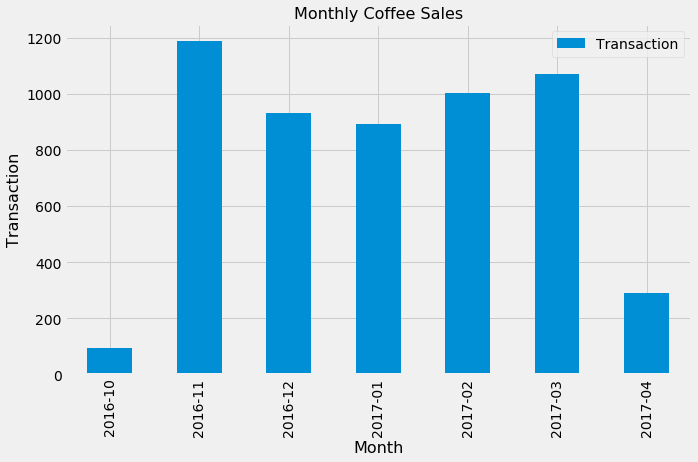

In [28]:
cofeeSalesMonthly = monthlyTransactionForItem[monthlyTransactionForItem['Item']=='Coffee'].plot(kind='bar', figsize=(10,6))
cofeeSalesMonthly.set_xlabel("Coffee Sales Monthly")

plt.ylabel('Transaction', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.title("Monthly Coffee Sales", fontsize=16);

In [29]:
data['daily'] = pd.to_datetime(data['datetime']).dt.to_period('D')
dailyTransactionForItem = data[['daily','Transaction', 'Item']].groupby(['daily', 'Item'], as_index=False).count().sort_values(by='daily')
dailyTransactionForItem.set_index('daily' ,inplace=True)

dailyTransactionForItem.head(35)

Item  Transaction
daily                                          
2016-10-30                  Basket            2
2016-10-30        Victorian Sponge            3
2016-10-30                     Tea           12
2016-10-30                 Tartine            3
2016-10-30                    Soup            1
2016-10-30               Smoothies            1
2016-10-30            Scandinavian           16
2016-10-30      Pick and Mix Bowls            1
2016-10-30                    NONE           10
2016-10-30                  Muffin           12
2016-10-30           Mineral water            3
2016-10-30          Mighty Protein            1
2016-10-30               Medialuna           11
2016-10-30                  Pastry            6
2016-10-30                     Jam            6
2016-10-30                   Juice            3
2016-10-30                    Cake            1
2016-10-30            Chicken sand            1
2016-10-30                  Coffee           33
2016-10-30                 Cookies            2
2016-10-30  Ella's Kitchen Pouches            1
2016-10-30                   Bread           29
2016-10-30                Frittata            6
2016-10-30                   Fudge            5
2016-10-30       Hearty & Seasonal            5
2016-10-30           Hot chocolate            4
2016-10-30              Farm House            2
2016-10-31          Mighty Protein            1
2016-10-31           Mineral water            3
2016-10-31                  Muffin           17
2016-10-31        My-5 Fruit Shoot            1
2016-10-31                    NONE            6
2016-10-31                Sandwich            3
2016-10-31      Pick and Mix Bowls            1
2016-10-31                    Soup            7

In [30]:
data['hourly'] = pd.to_datetime(data['datetime']).dt.to_period('H')
hourlyTransactionForItem = data[['hourly','Transaction', 'Item']].groupby(['hourly', 'Item'], as_index=False).count().sort_values(by='hourly')
hourlyTransactionForItem.set_index('hourly' ,inplace=True)

hourlyTransactionForItem.head(35)

Item  Transaction
hourly                                         
2016-10-30 09:00             Bread            1
2016-10-30 10:00               Tea            2
2016-10-30 10:00           Tartine            1
2016-10-30 10:00      Scandinavian            6
2016-10-30 10:00            Pastry            6
2016-10-30 10:00              NONE            3
2016-10-30 10:00            Muffin            4
2016-10-30 10:00         Medialuna            8
2016-10-30 10:00     Mineral water            1
2016-10-30 10:00     Hot chocolate            2
2016-10-30 10:00             Fudge            1
2016-10-30 10:00        Farm House            2
2016-10-30 10:00           Cookies            1
2016-10-30 10:00            Coffee            7
2016-10-30 10:00             Bread           12
2016-10-30 10:00            Basket            1
2016-10-30 10:00               Jam            3
2016-10-30 11:00              NONE            3
2016-10-30 11:00               Tea            3
2016-10-30 11:00      Scandinavian            5
2016-10-30 11:00            Muffin            4
2016-10-30 11:00           Tartine            1
2016-10-30 11:00               Jam            1
2016-10-30 11:00            Coffee            5
2016-10-30 11:00             Bread            7
2016-10-30 11:00            Basket            1
2016-10-30 11:00             Juice            1
2016-10-30 12:00  Victorian Sponge            2
2016-10-30 12:00               Tea            2
2016-10-30 12:00              Soup            1
2016-10-30 12:00      Scandinavian            3
2016-10-30 12:00            Muffin            1
2016-10-30 12:00             Juice            1
2016-10-30 12:00               Jam            1
2016-10-30 12:00         Medialuna            3

# Customer segmentation and market basket analysis

This notebook we using publicly dataset On-line Retail to explore customer segmentation through the interesting task of unsupervised learning method. Then we go further and apply association rule mining approach to find interesting rules and patterns in this transaction database. These customer segmentation, rules and patterns can be used to make interesting and useful decisions as far as user interest is concerned

Customer segmentation: Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.



Market basket analysis: Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

In [31]:
! pip install pandasql

In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [36]:
!conda install -y orange3

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\Anaconda3

  added / updated specs:
    - orange3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anyqt-0.0.10               |           py37_0          46 KB
    ca-certificates-2019.5.15  |                0         126 KB
    certifi-2019.6.16          |           py37_0         151 KB
    conda-4.7.12               |           py37_0         3.0 MB
    fasttsne-0.2.13            |   py37h8c2d366_1         282 KB
    keyrings.alt-3.1.1         |           py37_0          36 KB
    openssl-1.1.1c             |       he774522_1         4.8 MB
    orange3-3.19.0           

In [38]:
!pip install orange3

In [42]:
! pip install Orange3-Associate

  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\80\61\4a\dcd517a56d437ea374e32f2c7ffdb31047edab82d82d665af5
Successfully built Orange3-Associate


In [3]:
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *


In [4]:
data =pd.read_excel("C://Users//DELL//Downloads//DATASET END TO END WORKOUT//Online Retail.xlsx")

In [5]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
print(data.shape)
print('-'*70)
print(data.dtypes)

(541909, 8)
----------------------------------------------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [58]:
counts = data.apply(lambda x: x.count())
counts

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [60]:
uniques = data.apply(lambda x: [x.unique()])
uniques

InvoiceNo      [[536365, 536366, 536367, 536368, 536369, 5363...
StockCode      [[85123A, 71053, 84406B, 84029G, 84029E, 22752...
Description    [[WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...
Quantity       [[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 8...
InvoiceDate    [[2010-12-01 08:26:00, 2010-12-01 08:28:00, 20...
UnitPrice      [[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2....
CustomerID     [[17850.0, 13047.0, 12583.0, 13748.0, 15100.0,...
Country        [[United Kingdom, France, Australia, Netherlan...
dtype: object

In [62]:
nulls = data.apply(lambda x: x.isnull().sum())
nulls

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [65]:
obs = data.shape[0]
missing_ratio = (data.isnull().sum()/ obs) * 100
missing_ratio

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [71]:
skewness = data.skew()
kurtosis = data.kurt()
print(skew)
print('-'*70)
print(kurtosis)


<function skew at 0x000001809C4E0AE8>
----------------------------------------------------------------------
Quantity      119769.160031
UnitPrice      59005.719097
CustomerID        -1.179982
dtype: float64


In [72]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

InvoiceNo: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
StockCode: Identifier for items contained in an invoice.
Description: Textual description of each of the stock item.
Quantity: The quantity of the item purchased.
InvoiceDate: Date of purchase.
UnitPrice: Value of each item.
CustomerID: Identifier for customer making the purchase.
Country: Country of customer.

In [7]:
print('Check if we had negative quantity and prices at same register:',
     'No' if data[(data.Quantity<0) & (data.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')
print('Check how many register we have where quantity is negative',
      'and prices is 0 or vice-versa:',
      data[(data.Quantity<=0) & (data.UnitPrice<=0)].shape[0])
print('\nWhat is the customer ID of the registers above:',
      data.loc[(data.Quantity<=0) & (data.UnitPrice<=0), 
                ['CustomerID']].CustomerID.unique())
print('\n% Negative Quantity: {:3.2%}'.format(data[(data.Quantity<0)].shape[0]/data.shape[0]))
print('\nAll register with negative quantity has Invoice start with:', 
      data.loc[(data.Quantity<0) & ~(data.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())
print('\nSee an example of negative quantity and others related records:')
display(data[(data.CustomerID==12472) & (data.StockCode==22244)])

Check if we had negative quantity and prices at same register: No 

Check how many register we have where quantity is negative and prices is 0 or vice-versa: 1336

What is the customer ID of the registers above: [nan]

% Negative Quantity: 1.96%

All register with negative quantity has Invoice start with: ['C']

See an example of negative quantity and others related records:


InvoiceNo StockCode                 Description  Quantity  \
1973     C536548     22244  3 HOOK HANGER MAGIC GARDEN        -4   
9438      537201     22244  3 HOOK HANGER MAGIC GARDEN        12   
121980    546843     22244  3 HOOK HANGER MAGIC GARDEN        12   

               InvoiceDate  UnitPrice  CustomerID  Country  
1973   2010-12-01 14:33:00       1.95     12472.0  Germany  
9438   2010-12-05 14:19:00       1.95     12472.0  Germany  
121980 2011-03-17 12:40:00       1.95     12472.0  Germany

In [9]:
# Remove register withou CustomerID
data = data[~(data.CustomerID.isnull())]

# Remove negative or return transactions
data = data[~(data.Quantity<0)]
data = data[data.UnitPrice>0]

details = rstr(data)
display(details.sort_values(by='distincts', ascending=False))

AttributeError: 'str' object has no attribute 'sort_values'

### Customer Segmentation:
Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

##### Higher Revenue: This is the most obvious requirement of any customer segmentation project.

##### Customer Understanding: One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.


##### Target Marketing: The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.


##### Optimal Product Placement: A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.



##### Finding Latent Customer Segments: Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

# Clustering:

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

# Exploratory Data Analysis:

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

### RFM Model for Customer Value:
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

##### Recency: The value of how recently a customer purchased at the establishment
##### Frequency: How frequent the customer’s transactions are at the establishment
##### Monetary value: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

Recency¶
To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase

In [10]:
refrence_date = data.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)
data['days_since_last_purchase'] = (refrence_date - data.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  data[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()

Reference Date: 2011-12-10 12:50:00


count          mean          std      min       25%      50%  \
CustomerID  4338.0  15300.408022  1721.808492  12346.0  13813.25  15299.5   
recency     4338.0     92.536422   100.014169      1.0     18.00     51.0   

                 75%      max  
CustomerID  16778.75  18287.0  
recency       142.00    374.0

In [14]:
customer_freq = (data[['CustomerID', 
                        'InvoiceNo']].groupby(["CustomerID", 
                                               'InvoiceNo']).count().reset_index())

In [17]:
data['amount'] = data.Quantity*data.UnitPrice

In [18]:
customer_monetary_val = (data[['CustomerID', 
                              'amount']].groupby("CustomerID").sum().reset_index())


In [19]:
customer_history_df = customer_history_df.merge(customer_freq)
customer_history_df = customer_history_df.merge(customer_monetary_val)

In [20]:
customer_history_df.describe()

CustomerID       recency      InvoiceNo         amount
count  18532.000000  18532.000000   18532.000000   18532.000000
mean   15266.378211     45.585474  559527.062487   11020.348198
std     1734.116296     70.888803   13040.177914   31381.298482
min    12346.000000      1.000000  536365.000000       3.750000
25%    13776.250000      4.000000  548352.500000     936.080000
50%    15178.500000     17.000000  559816.500000    2462.790000
75%    16779.000000     51.000000  570834.500000    6316.570000
max    18287.000000    374.000000  581587.000000  280206.020000

# Data Preprocessing
Once we have created our customer value dataset, we will perform some preprocessing on the data. For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

In [22]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['InvoiceNo'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean       std       min       25%       50%  \
amount_log     18532.0  1.054781e-15  1.000027 -4.177119 -0.661874 -0.045840   
recency_log    18532.0 -1.251703e-15  1.000027 -1.737937 -0.861091  0.054101   
frequency_log  18532.0  4.543812e-14  1.000027 -1.800580 -0.853099  0.033825   

                    75%       max  
amount_log     0.553974  2.969041  
recency_log    0.748986  2.009219  
frequency_log  0.869290  1.669219

Text(0.5, 0, 'Monetary')

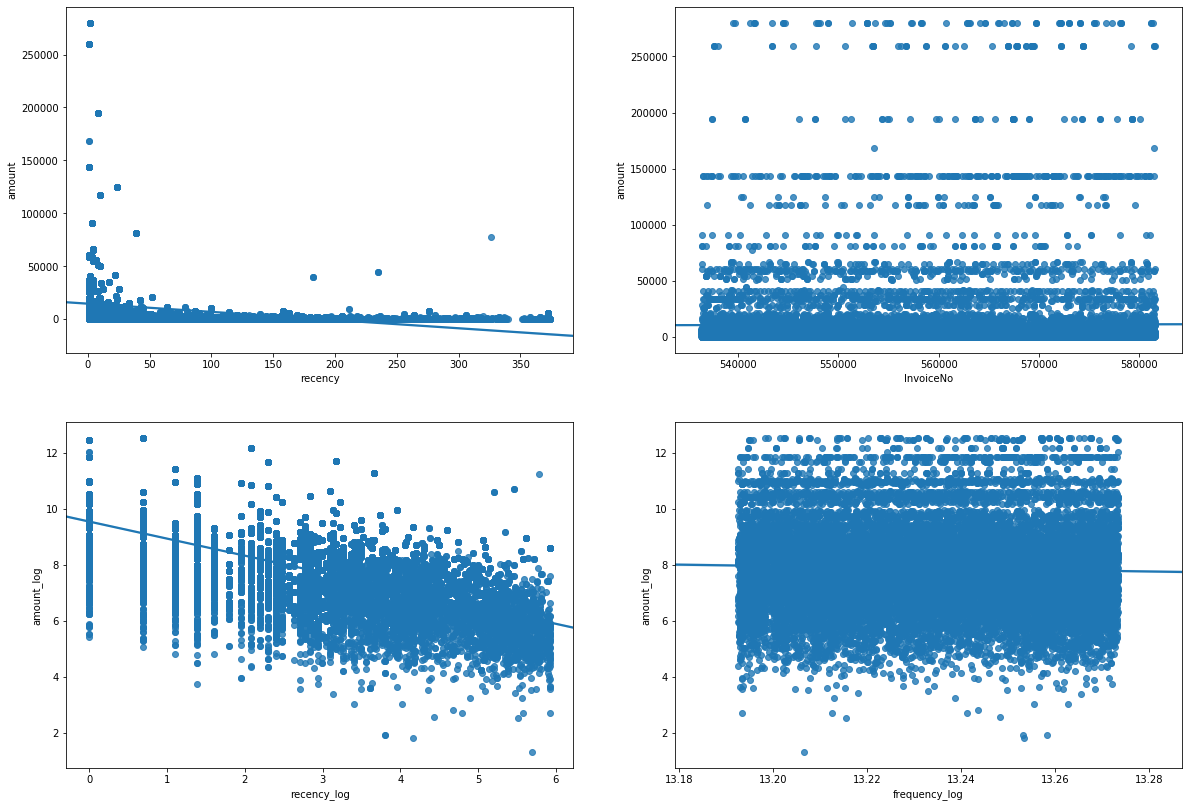

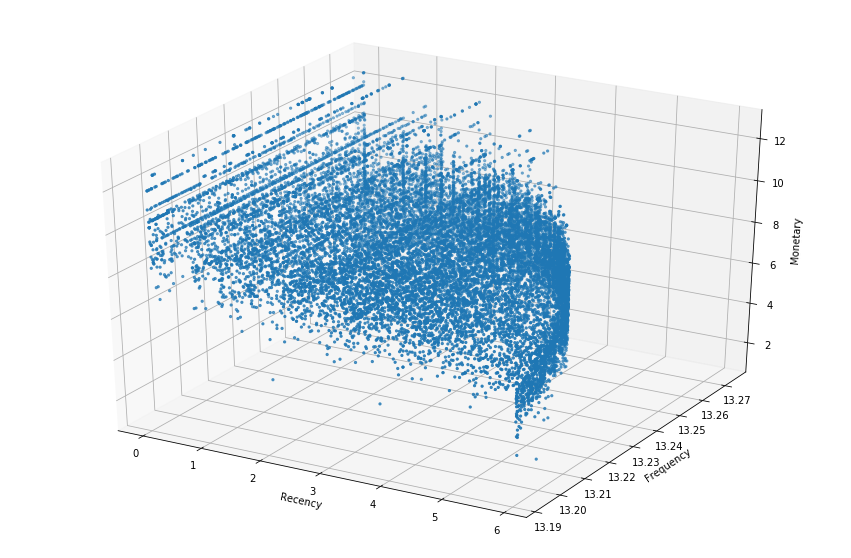

In [24]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='InvoiceNo', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Clustering for Segments
### K-Means Clustering
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster.

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia. So, the objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function:

##### The steps that happen in the K-means algorithm for partitioning the data are as given follows:

The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.
In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.
Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.
The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.



K-means++
Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

# The Elbow Method
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

This method looks at the percentage of variance explained as a function of the number of clusters. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.



In [27]:
cl = 50
K_best = cl

In [30]:
model = KMeans(
        n_clusters=K_best, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

In [31]:
model = model.fit(X_scaled)

In [32]:
# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)


The best K sugest:  50


# Silhouette analysis on K-Means clustering
Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_ope

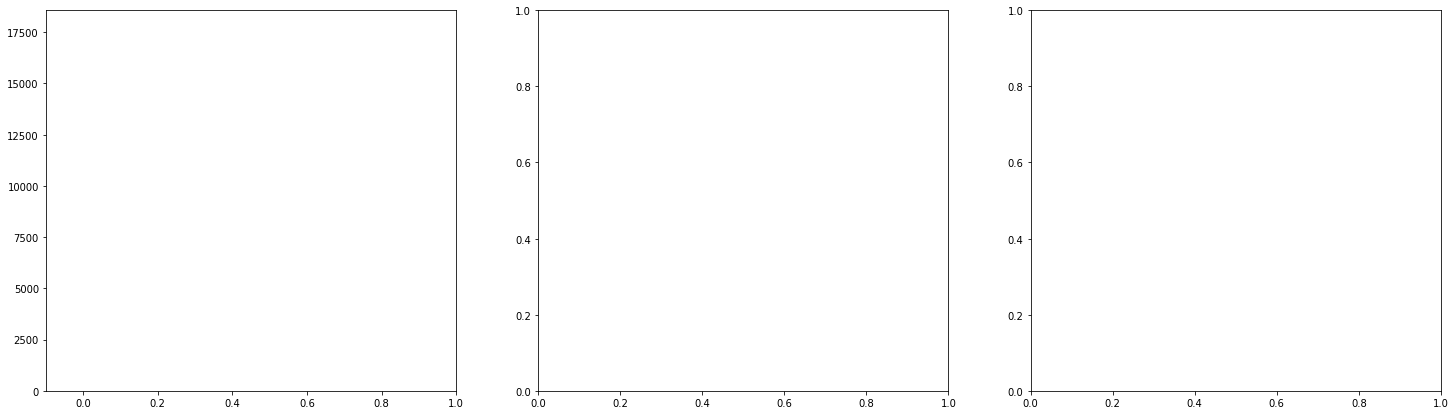

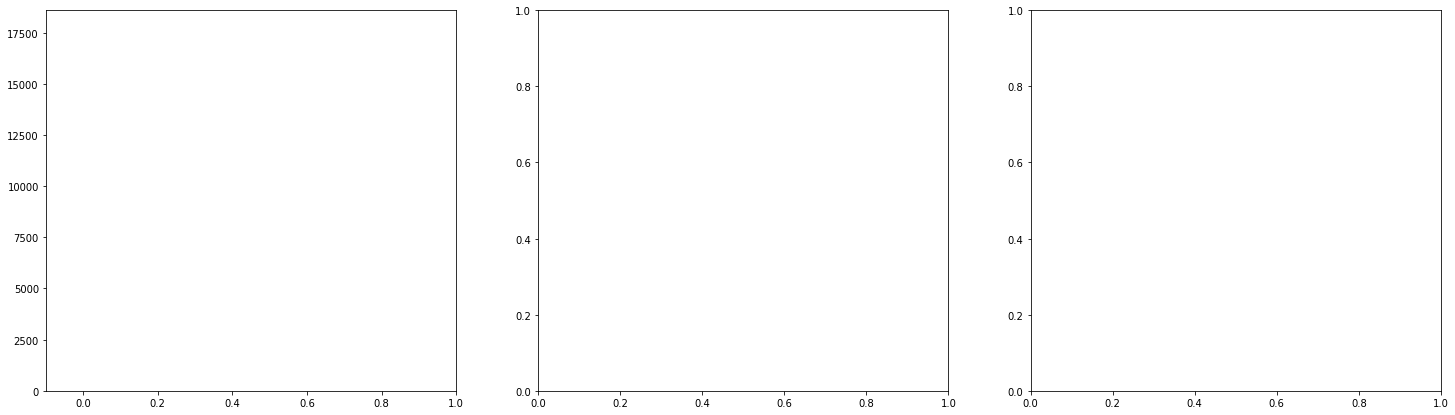

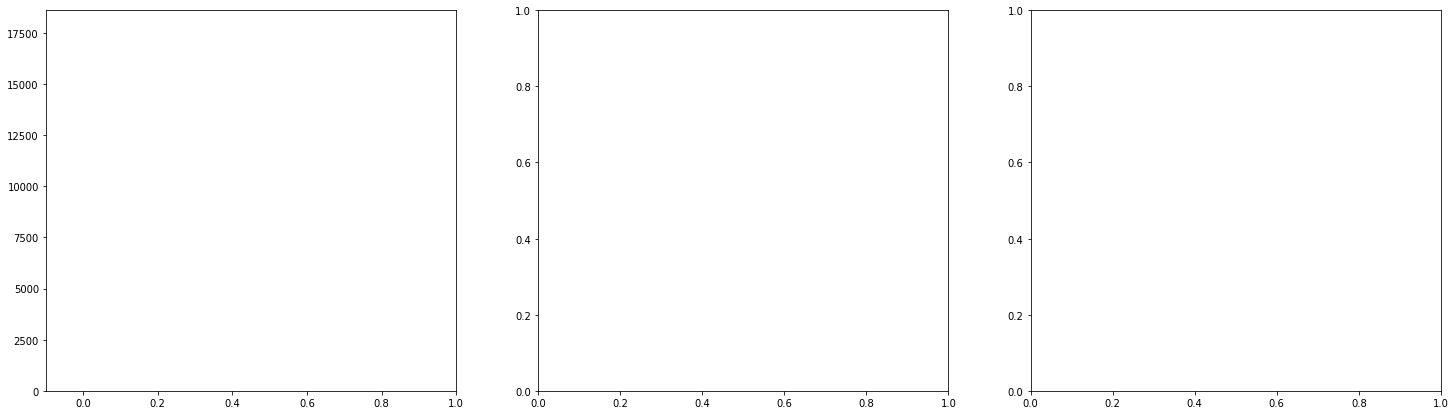

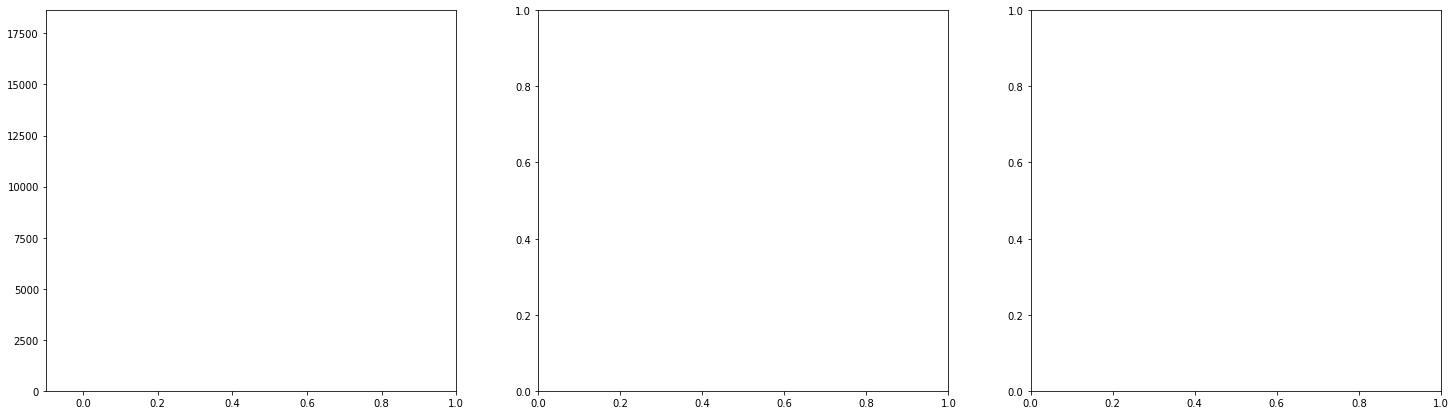

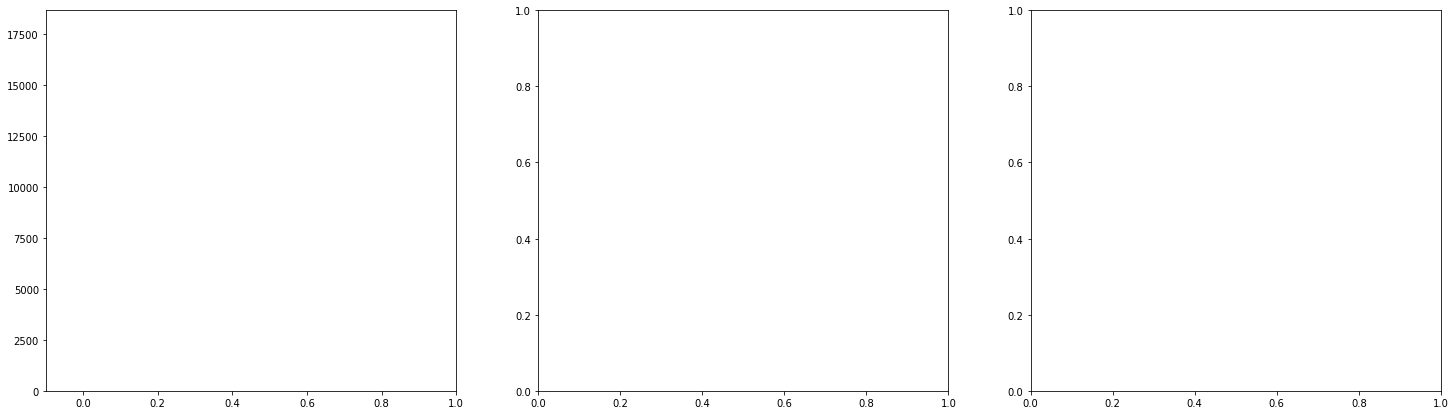

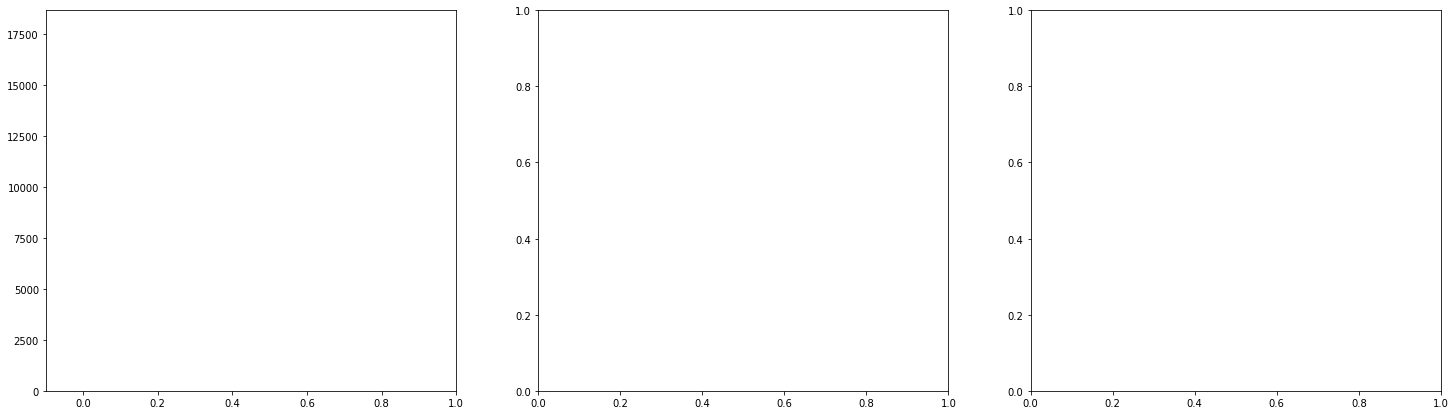

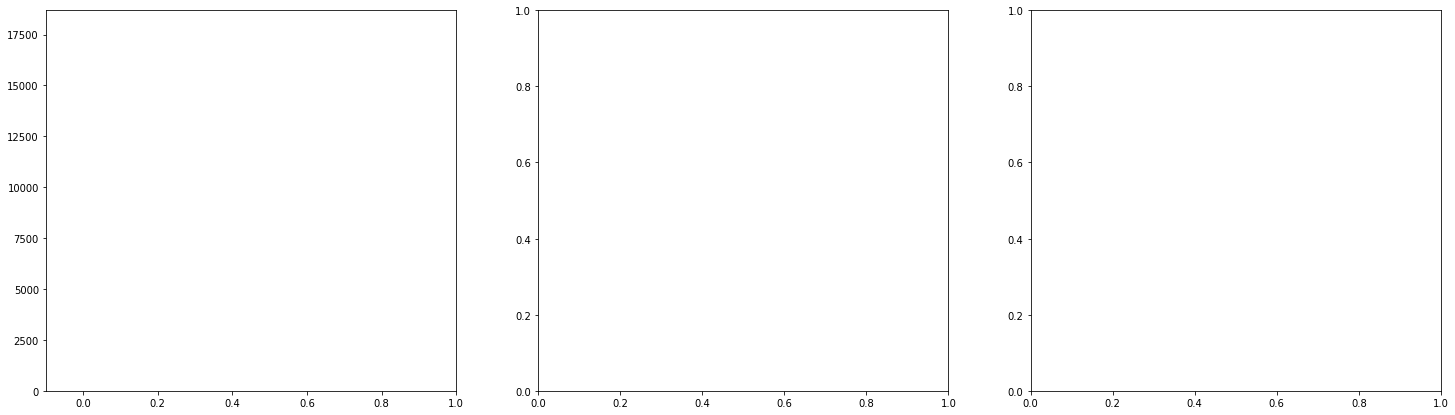

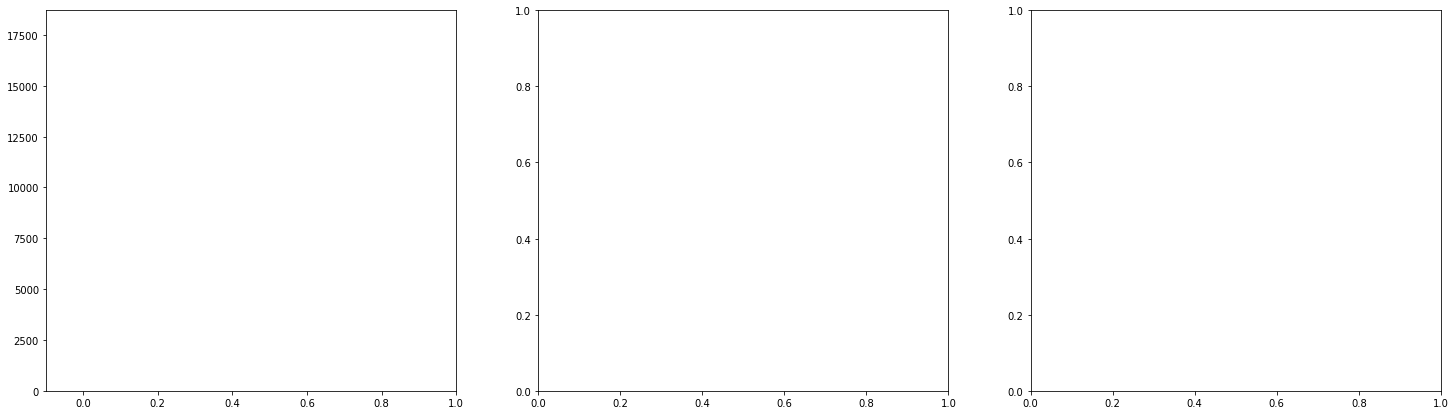

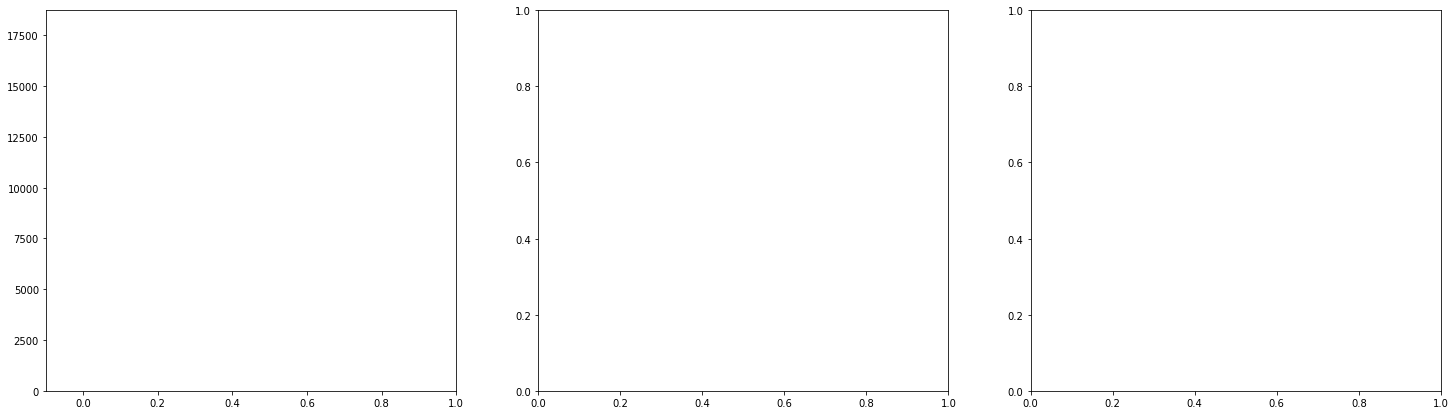

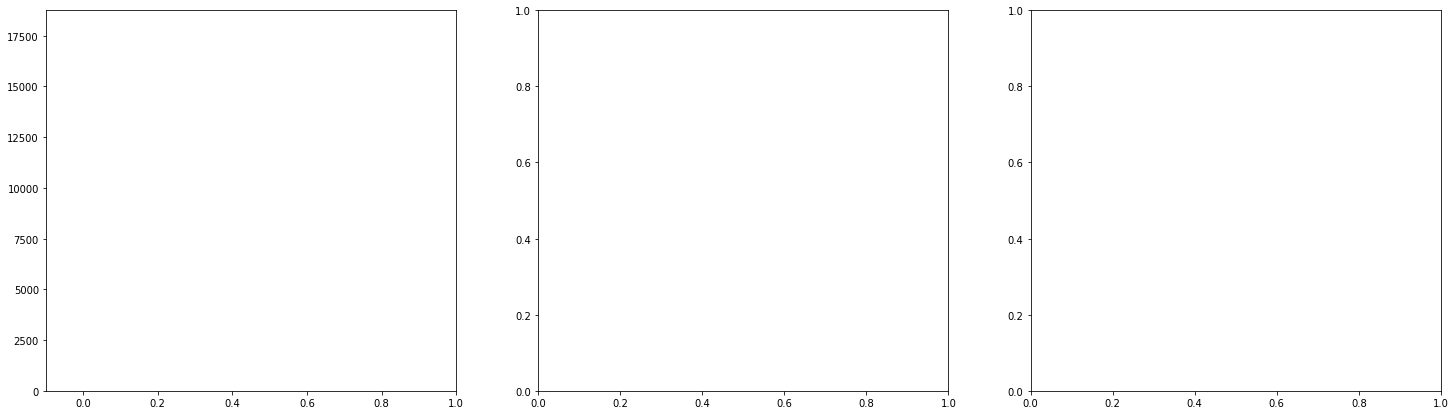

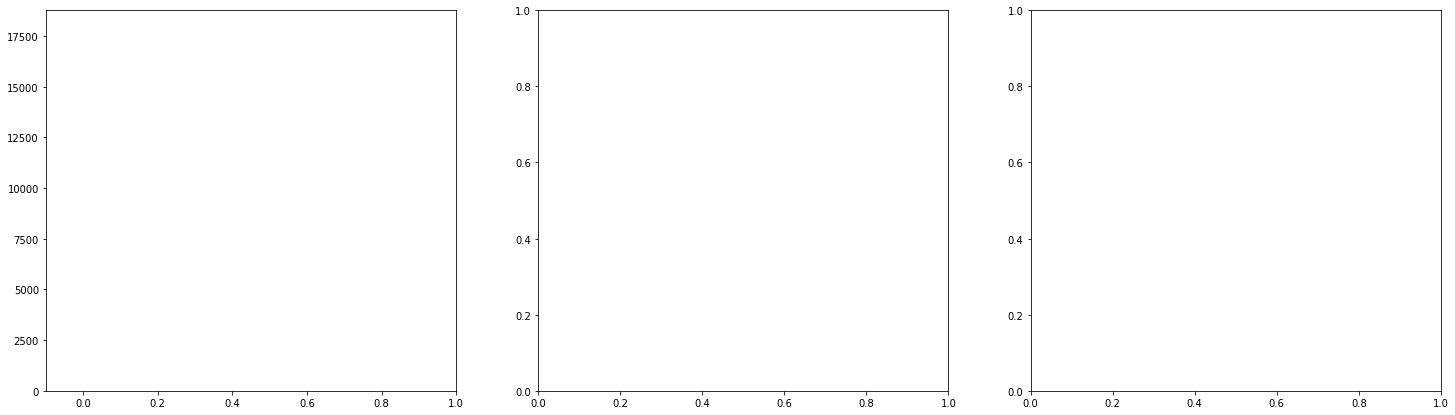

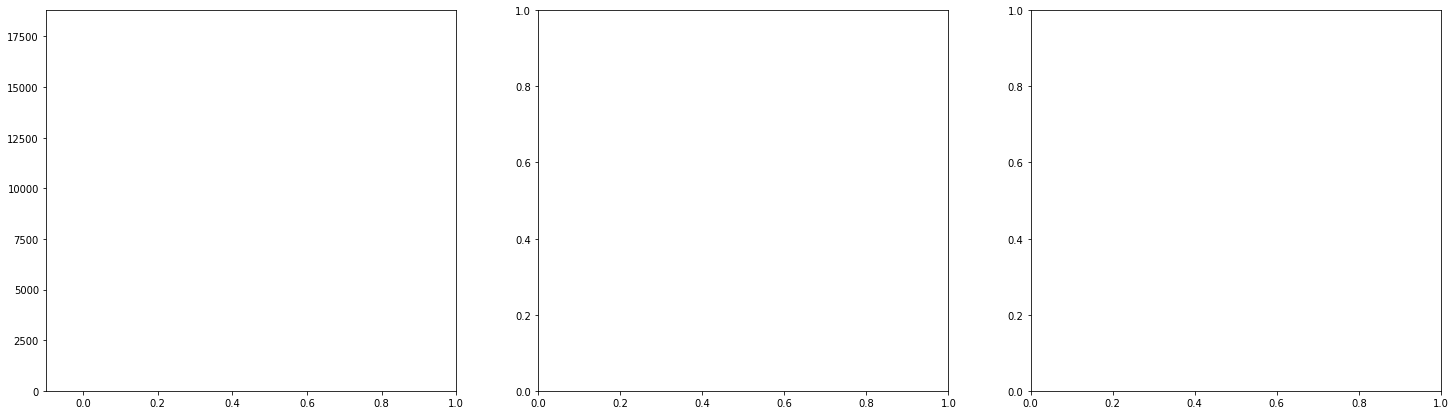

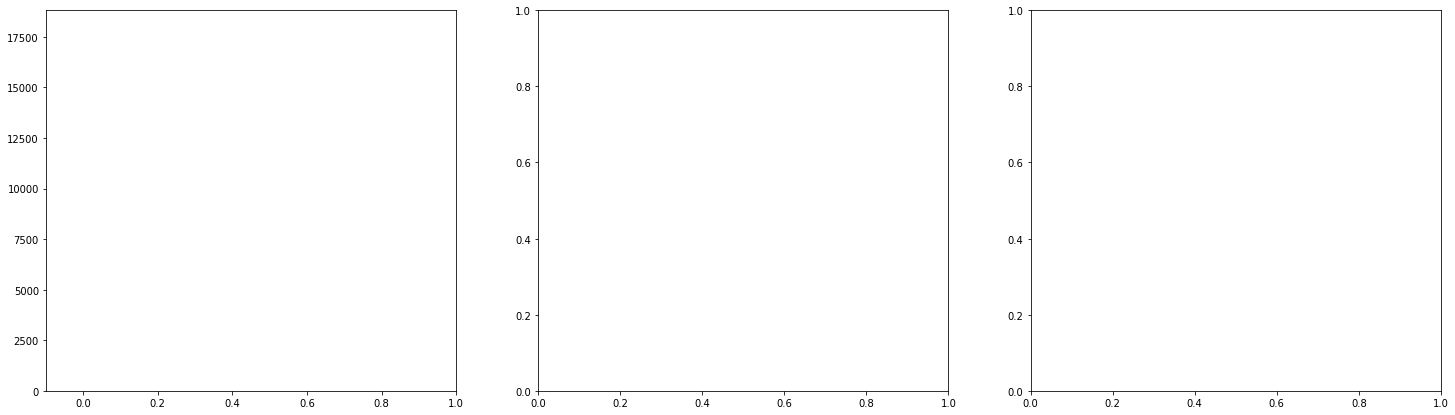

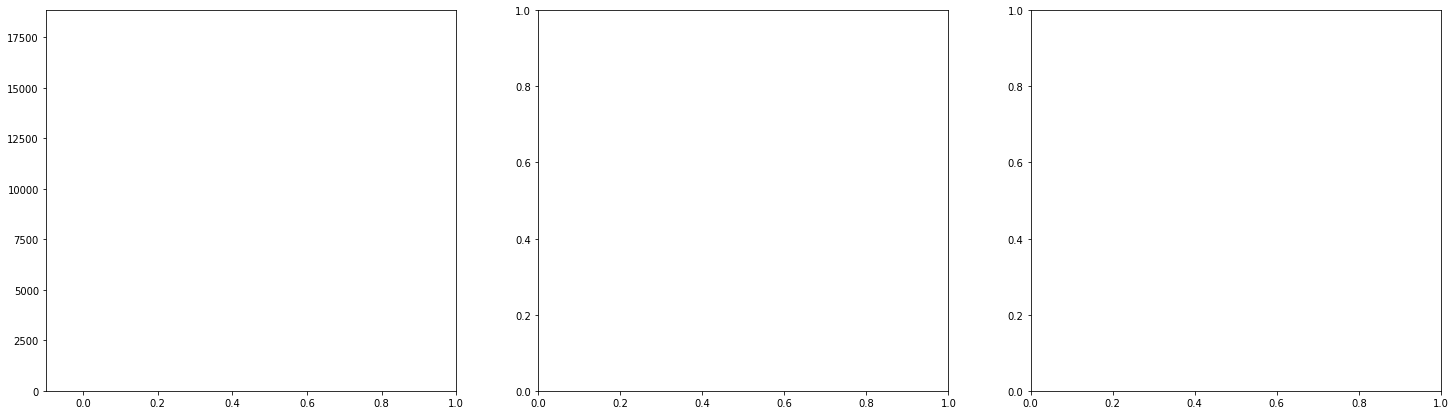

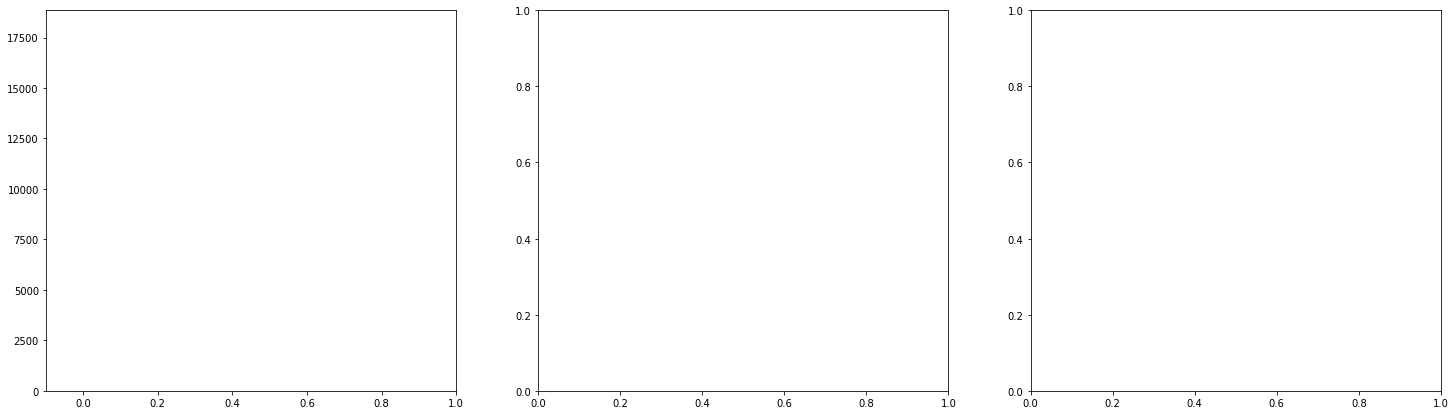

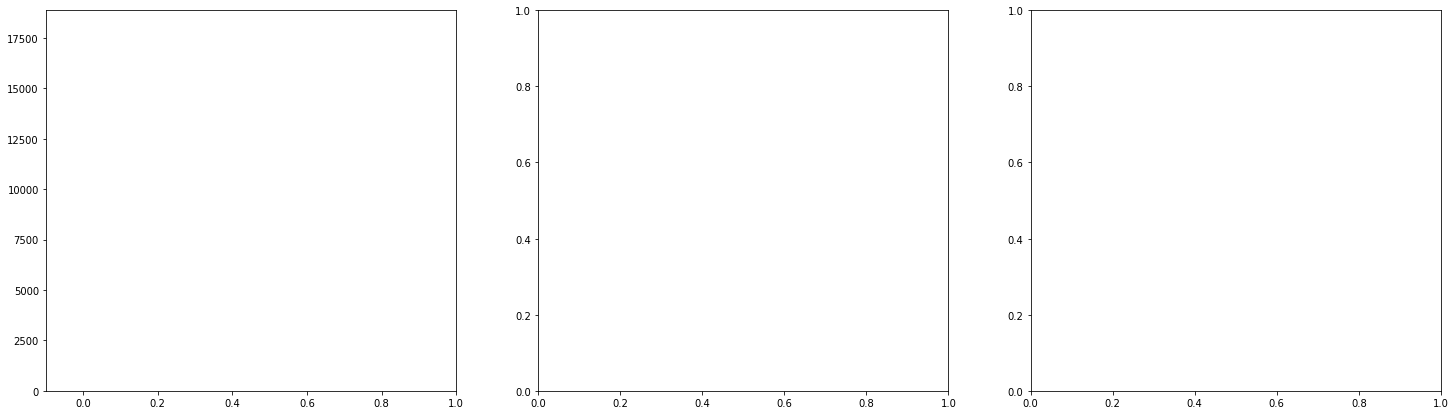

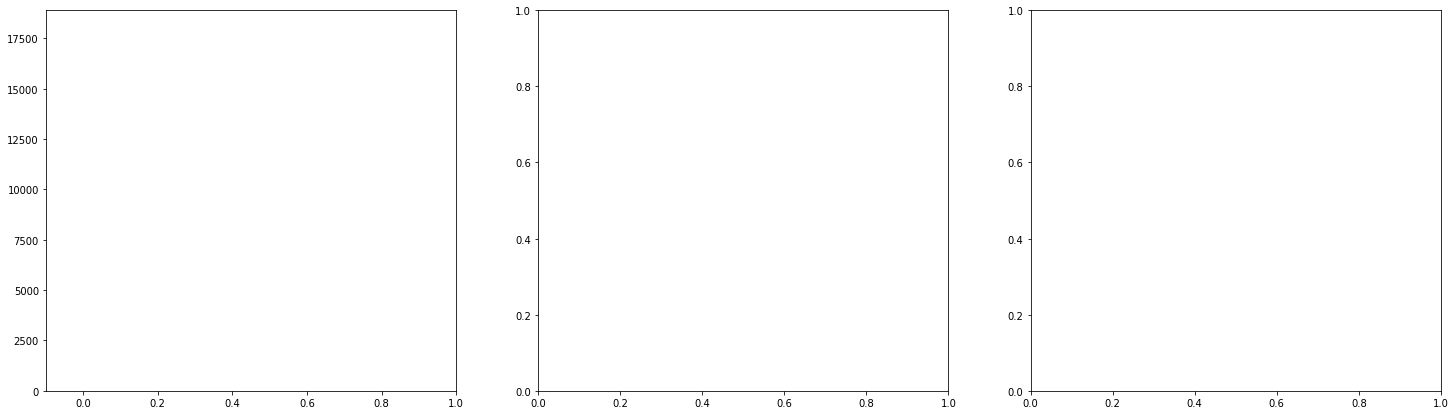

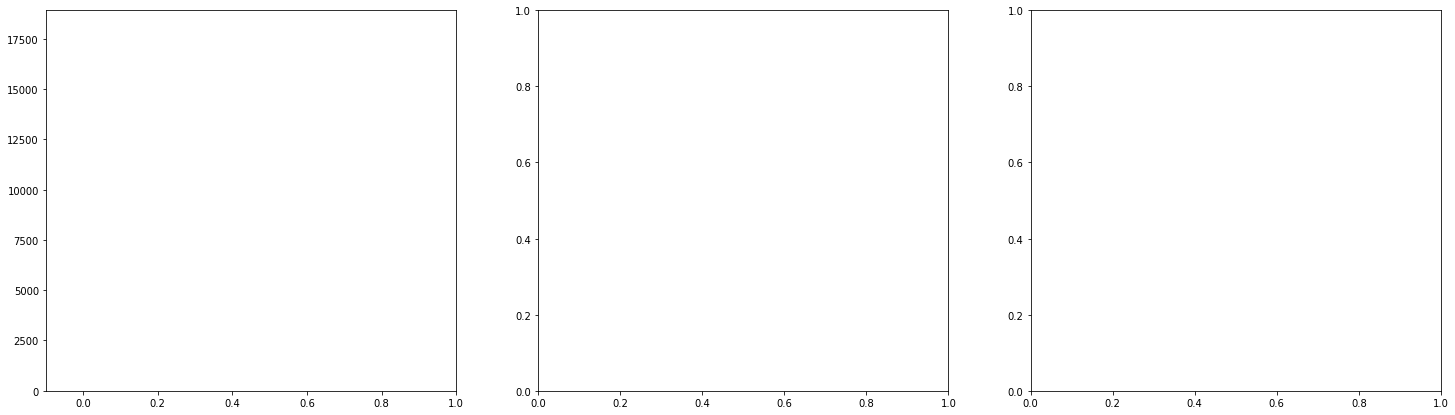

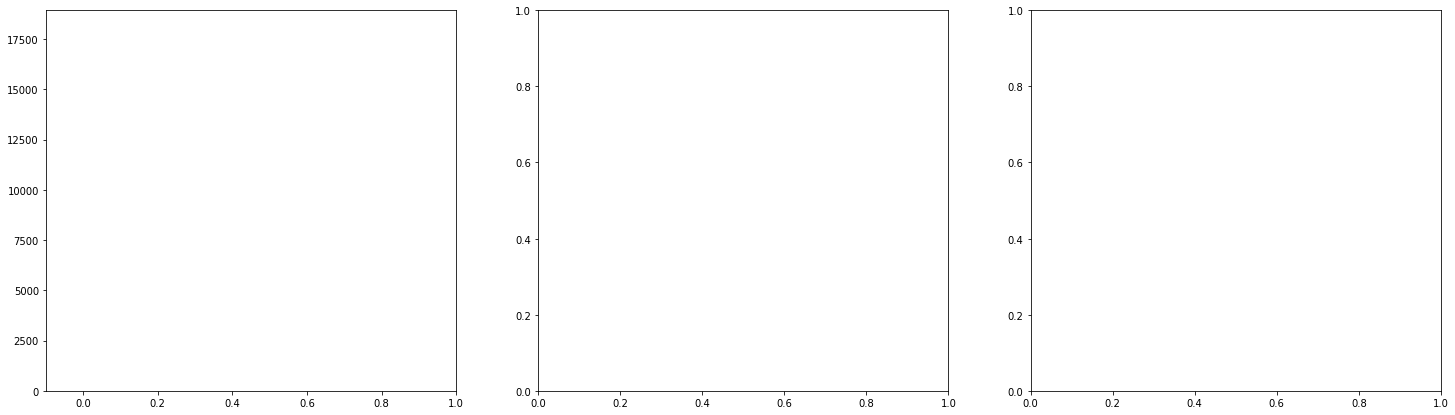

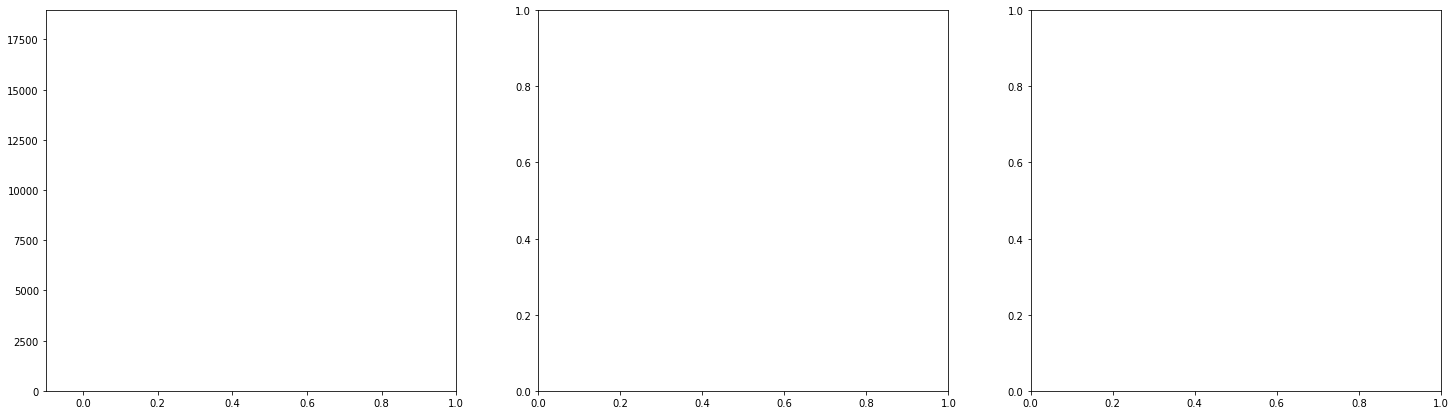

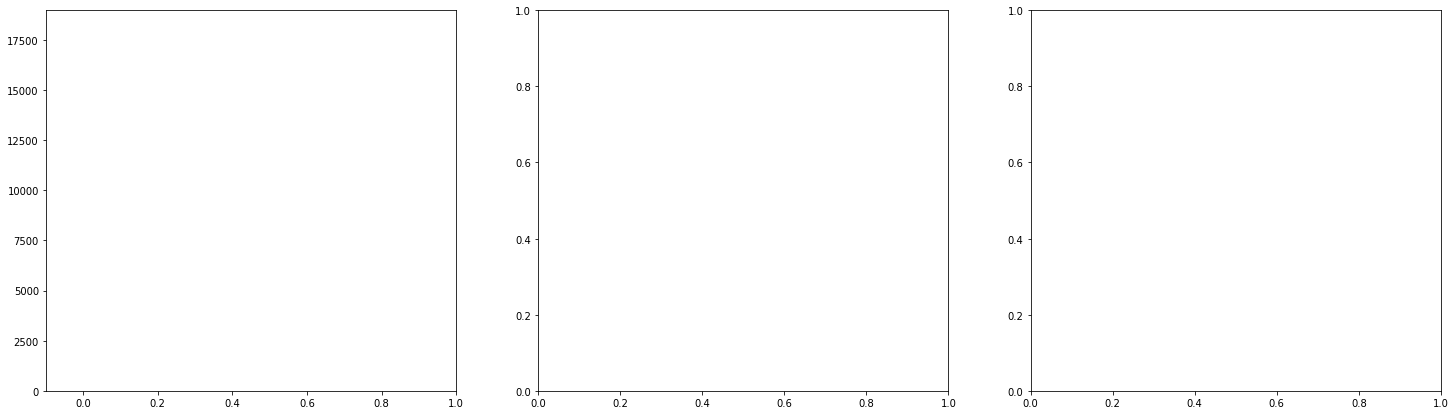

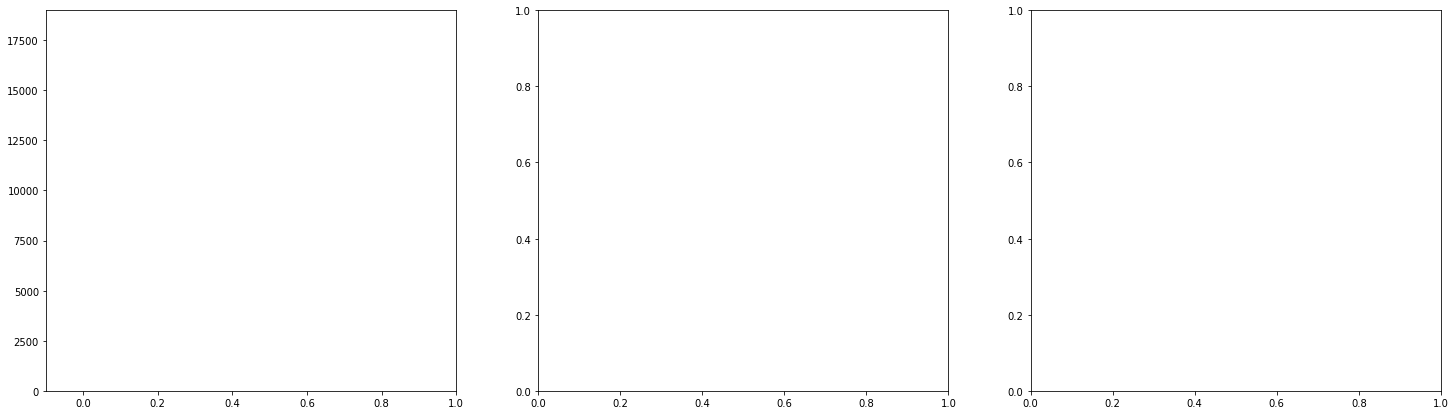

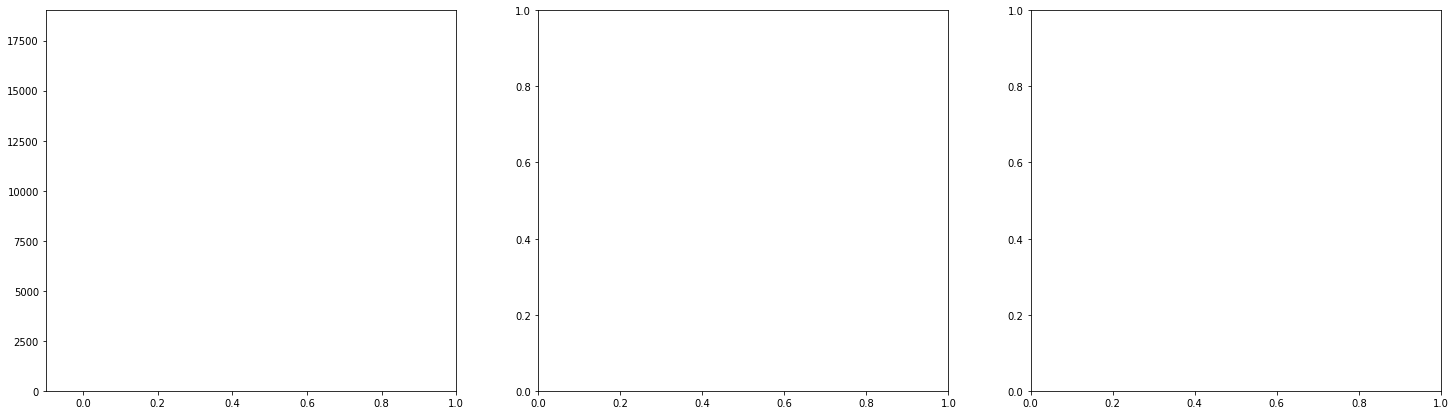

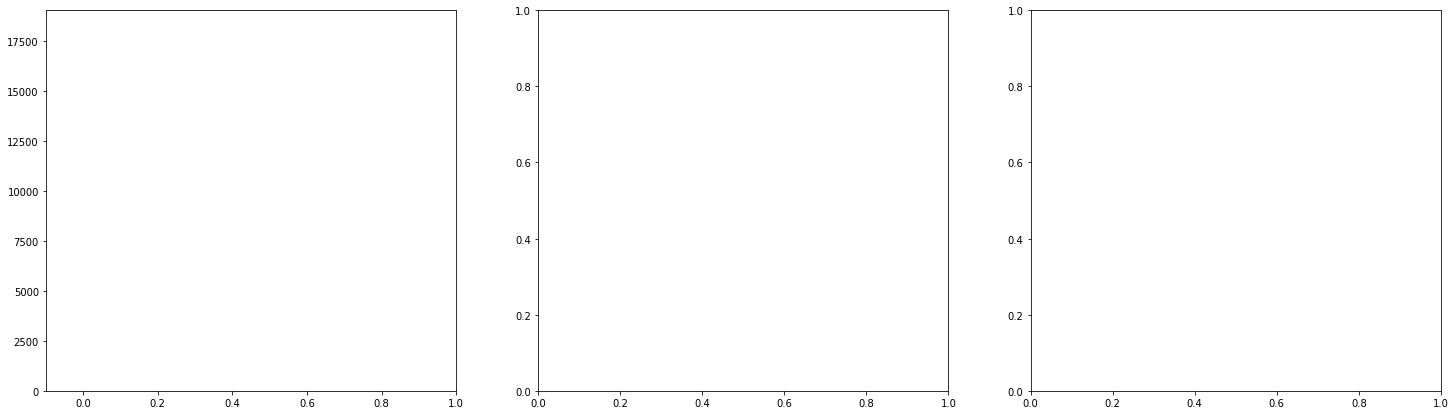

In [44]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

In [45]:
features = ['amount',  'recency',  'frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.32
Centers of each cluster:
         amount    recency      frequency
0   1667.260082  13.884269  572048.006551
1  13373.678281   3.459490  554299.211993
2   1010.631769  70.886897  549959.712605
--------------------------------------------------
for 5 clusters the silhouette score is 0.29
Centers of each cluster:
         amount     recency      frequency
0    657.833718  129.894177  548190.512507
1   3773.919752   11.199892  547571.143982
2   3835.122058    4.953788  572761.263980
3    922.299686   34.216927  569251.668148
4  36506.395781    2.186423  557158.530085
--------------------------------------------------
for 7 clusters the silhouette score is 0.28
Centers of each cluster:
         amount     recency      frequency
0   3152.468647    4.099577  573432.689553
1   3047.088404   30.351070  563805.821217
2    506.687614  160.791617  548493.254469
3   2513.479423   20.003598  545724.599607
4  49649.638839    2.400555  567245.592361
5  1271

CustomerID  recency  InvoiceNo   amount  recency_log  frequency_log  \
0     12346.0    326.0     541431  77183.6     5.786897      13.201971   
1     12347.0      2.0     537626   4310.0     0.693147      13.194918   
2     12347.0      2.0     542237   4310.0     0.693147      13.203458   
3     12347.0      2.0     549222   4310.0     0.693147      13.216258   
4     12347.0      2.0     556201   4310.0     0.693147      13.228885   

   amount_log  clusters_3  clusters_5  clusters_7  
0   11.253942           2           1           3  
1    8.368693           1           1           5  
2    8.368693           1           1           5  
3    8.368693           1           1           5  
4    8.368693           1           1           5

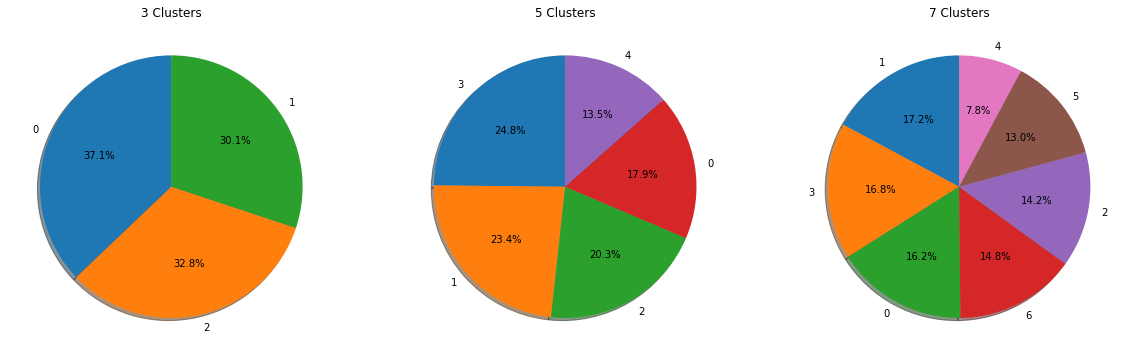

In [46]:
customer_history_df['clusters_3'] = cluster_centers[3]['labels'] 
customer_history_df['clusters_5'] = cluster_centers[5]['labels']
customer_history_df['clusters_7'] = cluster_centers[7]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = customer_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = customer_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = customer_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()